In [18]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os 
import glob
from FlowCytometryTools import FCMeasurement
import matplotlib.pyplot as plt

In [19]:
data_dir ='/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data'

In [20]:
studies = glob.glob(data_dir + '/*')

# Produce summaries

In [5]:
### Get Summaries
def get_summaries(input_dir):
    summary_file = os.path.join(input_dir + '_summary.txt')
    file_list = glob.glob(input_dir + '/*')
    with open(summary_file, 'w') as f:
        for i in np.arange(len(file_list)):
            file_loaded = file_list[i].split('/')[-1].split('.')[0]
            print('\n ##########', file_loaded, '##########', file=f)
            path = file_list[i]
            try:
                df = FCMeasurement(ID= file_loaded , datafile=path)
                #vars(df)
                #print(df.get_meta()['_channel_names_'], file=f)

                print("* columns/channels: ", df.get_data().columns, file=f)

                print("* shape data: ", df.get_data().shape, file=f)

                print("* satistics: " , df.get_data().describe(), file=f)
            except: 
                print('Error: could not be loaded', file=f)

In [6]:
# Amodio_et_al
#/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/Amodio_et_al
input_dir = studies[0]
print(input_dir)
get_summaries(input_dir)

/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/Amodio_et_al.


In [34]:
# Krieg et al 
#/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/FlowRepository_FR-FCM-ZY34_files 
input_dir = studies[0]
print(input_dir)
get_summaries(input_dir)

/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/FlowRepository_FR-FCM-ZY34_files


/Users/laurieprelot/software/anaconda/envs/py3/lib/python3.6/site-packages/fcsparser/api.py:332: UserWarning: The default channel names (defined by the $PnS parameter in the FCS file) were not unique. To avoid problems in downstream analysis, the channel names have been switched to the alternate channel names defined in the FCS file. To avoid seeing this warning message, explicitly instruct the FCS parser to use the alternate channel names by specifying the channel_naming parameter.
  warnings.warn(msg)


In [77]:
# Wagner et a. 
#/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/a-single-cell-atlas-of-the-tumor-and-immune-ecosystem-of-human-breast-cancer.-wagner-et-al./
for sub_dir in ['T_cells_clustered', 'Myeloid_cells_clustered', 'Epithelial_cells_clustered', 
                'CD45_cells_clustered', 'Live_cells_clustered']:
    input_dir = os.path.join(studies[1] , sub_dir)
    print(input_dir)
    get_summaries(input_dir)

/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/a-single-cell-atlas-of-the-tumor-and-immune-ecosystem-of-human-breast-cancer.-wagner-et-al./Live_cells_clustered


In [8]:
### Get Pannels
def get_markers(input_dir, exhaustive_markers):
    file_list = glob.glob(input_dir + '/*')

    for i in np.arange(len(file_list)):
        file_loaded = file_list[i].split('/')[-1].split('.')[0]
        path = file_list[i]
        try:
            df = FCMeasurement(ID= file_loaded , datafile=path)
            markerS = df.get_data().columns
            for marker in markerS:
               # print(marker)
                if marker not in exhaustive_markers:
                    exhaustive_markers.append(marker)
        except:
            print('Error:{} could not be loaded'.format(path))
    return exhaustive_markers

In [10]:
# Amodio_et_al
#/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/Amodio_et_al
input_dir = studies[0]
print(input_dir)
exhaustive_markers = []
exhaustive_markers = get_markers(input_dir, exhaustive_markers)
summary_file = os.path.join(data_dir, 'Amodio_et_al' + 'marker_list_.txt')
with open(summary_file, 'w') as f: 
    print(exhaustive_markers, file = f)

/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/Amodio_et_al.


In [19]:
# Krieg et al 
#/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/FlowRepository_FR-FCM-ZY34_files
input_dir = studies[0]
print(input_dir)
exhaustive_markers = []
exhaustive_markers = get_markers(input_dir)
summary_file = os.path.join(data_dir, 'FlowRepository_FR-FCM-ZY34_files' + 'marker_list_.txt')
with open(summary_file, 'w') as f: 
    print(exhaustive_markers, file = f)

/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/FlowRepository_FR-FCM-ZY34_files


/Users/laurieprelot/software/anaconda/envs/py3/lib/python3.6/site-packages/fcsparser/api.py:332: UserWarning: The default channel names (defined by the $PnS parameter in the FCS file) were not unique. To avoid problems in downstream analysis, the channel names have been switched to the alternate channel names defined in the FCS file. To avoid seeing this warning message, explicitly instruct the FCS parser to use the alternate channel names by specifying the channel_naming parameter.
  warnings.warn(msg)


Error:/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/FlowRepository_FR-FCM-ZY34_files/Krieg-response-to-PD-1-therapy-Nature-Med-Jan-2018.pdf could not be loaded
Error:/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/FlowRepository_FR-FCM-ZY34_files/attachments could not be loaded


In [31]:
# Wagner et a. 
#/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/a-single-cell-atlas-of-the-tumor-and-immune-ecosystem-of-human-breast-cancer.-wagner-et-al./
exhaustive_markers = []
for sub_dir in ['T_cells_clustered', 'Myeloid_cells_clustered', 'Epithelial_cells_clustered', 
                'CD45_cells_clustered', 'Live_cells_clustered']:
    input_dir = os.path.join(studies[1] , sub_dir)
    print(input_dir)
    exhaustive_markers = get_markers(input_dir, exhaustive_markers)
    #print(exhaustive_markers)
summary_file = os.path.join(data_dir, 'wagner-et-al_files_' + 'marker_list_.txt')
with open(summary_file, 'w') as f: 
    print(exhaustive_markers, file = f)

/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/a-single-cell-atlas-of-the-tumor-and-immune-ecosystem-of-human-breast-cancer.-wagner-et-al./T_cells_clustered
/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/a-single-cell-atlas-of-the-tumor-and-immune-ecosystem-of-human-breast-cancer.-wagner-et-al./Myeloid_cells_clustered
/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/a-single-cell-atlas-of-the-tumor-and-immune-ecosystem-of-human-breast-cancer.-wagner-et-al./Epithelial_cells_clustered


/Users/laurieprelot/software/anaconda/envs/py3/lib/python3.6/site-packages/fcsparser/api.py:332: UserWarning: The default channel names (defined by the $PnS parameter in the FCS file) were not unique. To avoid problems in downstream analysis, the channel names have been switched to the alternate channel names defined in the FCS file. To avoid seeing this warning message, explicitly instruct the FCS parser to use the alternate channel names by specifying the channel_naming parameter.
  warnings.warn(msg)


/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/a-single-cell-atlas-of-the-tumor-and-immune-ecosystem-of-human-breast-cancer.-wagner-et-al./CD45_cells_clustered
/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/a-single-cell-atlas-of-the-tumor-and-immune-ecosystem-of-human-breast-cancer.-wagner-et-al./Live_cells_clustered


# Preprocess data

In [21]:
dic = {'o':1}
dic.keys()

dict_keys(['o'])

In [22]:
### Functions 
def plot_cell_distrib(record_cells, preprocessed_data_path, dataset_name):
    plt.hist(record_cells)
    plt.title("cell distribution per file of {} Dataset".format(dataset_name))
    plt.xlabel("cell number in each file")
    plt.ylabel("distribution")
    plt.savefig(os.path.join(preprocessed_data_path, dataset_name + '_cell_distribution.pdf'), bbox_inches = "tight")
    plt.clf()
    
def rename_rules(data_id, data_pool, metadata_list = None, rename_dict = None):
    original_names = data_pool.columns
    new_names = [nm.split('_')[-1] for nm in original_names]
    
    if metadata_list: # Krieg, Wagner et al. 
        tmp = []
        for nm in new_names:
            if nm in metadata_list:
                tmp.append('metadata_' + nm )
            else:
                tmp.append( nm )
        new_names = tmp
        
    if rename_dict: #for Krieg et al!
        tmp = []
        for file_type in rename_dict:
            if file_type in data_id:
                rename_pattern = rename_dict[file_type]
                for nm in new_names:
                    if nm in rename_pattern.keys():
                        tmp.append(rename_pattern[nm])
                        print("remapped {}: {} in file {}".format(nm,rename_pattern[nm], data_id))
                    else:
                        tmp.append( nm )
        new_names = tmp
    data_pool.columns = new_names
    return data_pool


def pool_inputs(summary_file,input_dir, test = 0, nested = False, metadata_list = None, rename_dict = None):
    file_list = glob.glob(input_dir + '/*')
    record_cells = []   
        
    if test:
        counter = np.arange(test)
    else:
        counter = np.arange(len(file_list))

    if nested:
        dataset_name = input_dir.split('/')[-2] + '_' + input_dir.split('/')[-1]

    else:  
        dataset_name = input_dir.split('/')[-1] 
        
    with open(summary_file, 'a') as f: 
        for i in counter:
            file_loaded = file_list[i].split('/')[-1].split('.')[0]
            path = file_list[i]
            try:
                df = FCMeasurement(ID= file_loaded , datafile=path)
                data = df.data
                data["ID"] = file_loaded
                print(' Loaded file: {}'.format(df.ID))
                print('cells number : {}'.format(df.get_data().shape[0]))
                record_cells.append(df.get_data().shape[0])
                #
                if i: 
                    data_pool = pd.concat([data_pool, data], axis = 0, sort=False )
                else:
                    data_pool = data
            except: 
                print('Error: could not be loaded {}'.format(file_loaded))
                
        data_pool = rename_rules(df.ID, data_pool, metadata_list, rename_dict)
        print('Total number of cells in Dataset: {}, {}'.format(dataset_name, data_pool.shape[0] ), file = f)
        print('{} Markers present (columns): {}'.format(data_pool.shape[1], data_pool.columns), file = f)
        data_pool.to_csv(os.path.join(preprocessed_data_path, dataset_name + '_pooled_input.tsv'), sep = '\t')
        plot_cell_distrib(record_cells, preprocessed_data_path, dataset_name)
        
    

In [23]:
### Create Folders
preprocessed_data_path = os.path.join(data_dir, 'preprocessed')
if not os.path.isdir(preprocessed_data_path):
    os.mkdir(preprocessed_data_path)
summary_file = os.path.join(preprocessed_data_path , 'README_preprocessing')
os.remove(summary_file)

In [24]:
studies

['/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/Amodio_et_al.',
 '/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/preprocessed',
 '/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/Wagner-et-al.',
 '/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/Krieg_et_al.',
 '/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/xx']

In [26]:
# Amodio_et_al
#/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/Amodio_et_al
input_dir = studies[0]
print(input_dir)
pool_inputs(summary_file,input_dir, test = False, nested = False)

/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/Amodio_et_al.
 Loaded file: sample13
cells number : 69834
 Loaded file: sample118
cells number : 30819
 Loaded file: sample124
cells number : 35275
 Loaded file: sample130
cells number : 61658
Error: could not be loaded Amodio_et_al
 Loaded file: sample131
cells number : 59574
 Loaded file: sample125
cells number : 47946
 Loaded file: sample12
cells number : 88019
 Loaded file: sample119
cells number : 41036
 Loaded file: sample10
cells number : 19792
 Loaded file: sample38
cells number : 60585
 Loaded file: sample133
cells number : 28311
 Loaded file: sample127
cells number : 69245
 Loaded file: sample126
cells number : 115717
 Loaded file: sample39
cells number : 86900
 Loaded file: sample132
cells number : 40907
 Loaded file: sample11
cells number : 22023
 Loaded file: sample9
cells number : 22960
 Loaded file: sample136
cells number : 89276
 Loaded file: sample29
cells number : 98310
 Loaded file: sample122
cells number

<Figure size 432x288 with 0 Axes>

In [27]:
# Krieg et al 
#/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/FlowRepository_FR-FCM-ZY34_files 

metadata_list = ['DNA1','DNA2','195Pt','196Pt','Dead','FSC-A',
'FSC-H','FSC-W','SSC-A','SSC-H','SSC-W', 'Time']

rename_dict = {
    'facs': {'Brilliant Violet 785-A':'CD3', #    BV785	CD3
                 'Brilliant Violet 711-A':'CD4', # BV711	CD4
                 'Brilliant Violet 421-A':'CD11b', # BV421	CD11b
                 'PerCP-Cy5-5-A':'CD33', # PerCP/PerCPCy5.5	CD33
                 'FITC-A': 'HLA-DR', # FITC	HLA-DR
                 'PE-Cy7-A':'CD56', # PE-Cy7	CD56 #
                 'PE-Texas Red-A': 'CD45RO', # Pe-TxRd	CD45RO
                 'APC-Cy7-A':'NIR', # APC-Cy7	NIR
                 'Alexa Fluor 700-A':'CD11c',  #  AF700	CD11c
                 'APC-A': 'CD16', #APC	CD16
                 'PE-A':'CD14', # PE	CD14
                 'Brilliant Violet 605-A':'CD19', # BV605	CD19
            }, 
    'Panel2':{  '173Yb':'CD56', 
                '155Gd':'CD27', 
                '171Yb': 'Granzyme-B',
                
               },
    'Panel3':{  '173Yb':'CD56', 
                '155Gd':'CD1c', 
                
               },
    'Panel1':{  '173Yb':'CD56', 
                '155Gd':'CD27', 
                '171Yb': 'Granzyme-B',
                
               }
}
            # PANEL 2 Yb173Di	173	Yb	CD56	1
            #PANEL3 Yb173Di	173	Yb	CD56	1
            # PANEL 1 Yb173Di	173	Yb	CD56

            # PANEL 2 Gd155Di	155	Gd	CD27	1 
            # PANEL3 Gd155Di	155	Gd	CD1c	1
            # PANEL 1: Gd155Di	155	Gd	CD27

            #PANEL 2 Yb171Di	171	Yb	Granzyme-B	1
            # PANEL 3 NA 
            # PANEL 2 Yb171Di	171	Yb	Granzyme-B	1
for sub_dir in  ['facs','Cytof']:
    input_dir = studies[2]
    print(input_dir)
    input_dir = os.path.join(input_dir , sub_dir)

    pool_inputs(summary_file,input_dir, test = False, nested = True, 
                metadata_list = metadata_list, rename_dict = rename_dict)

/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/Wagner-et-al.


UnboundLocalError: local variable 'df' referenced before assignment

In [28]:
# Wagner et a. 
contaminants1 = ['Sn', 'I', 'Xe', 'Cs', 'Ba', 'Os', 'Pb', 'Gd', 'La'] # Conlaminants 
contaminants2 = ['120', '127', '131', '133', '138', '190', '208', '157', '139']
cI = [''.join(i) for i in list(zip(contaminants1, contaminants2))]
cII = [''.join(i) for i in list(zip(contaminants2, contaminants1))]
cI_I = ['X'  +  i for i in cI ]
cII_I = ['X'  +  i for i in cII ]
Volume  = ['Vol' + str(i) for i in np.arange(10)] # Cell Volume 
BCs = ['BC' + str(i) for i in np.arange(10)] #  The Value of Serum Biomarkers (Bc1, Bc2, Bc3) in the ...

metadata_list = ['cluster', 'Center', 'Event_length', 'Offset', 'Residual', 'Time',
       'Width', 'beadDist' ,'length', 'Beads' , 'DNA1', 'DNA2',
       'cisPt1', 'cisPt2' ] + cI + cII + cI_I + cII_I + Volume +  BCs #Ciplastin = Dead Cells 
#page 13
#https://www.fluidigm.com/binaries/content/documents/fluidigm/resources/cell-id-20-plex-pd-barcoding-kit-ug-prd023/cell-id-20-plex-pd-barcoding-kit-ug-prd023/fluidigm%3Afile 
            

    
    
#/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/a-single-cell-atlas-of-the-tumor-and-immune-ecosystem-of-human-breast-cancer.-wagner-et-al./
for sub_dir in ['T_cells_clustered', 'Myeloid_cells_clustered', 'Epithelial_cells_clustered', 
                'CD45_cells_clustered', 'Live_cells_clustered']:
    input_dir = os.path.join(studies[1] , sub_dir)
    print(input_dir)
    pool_inputs(summary_file,input_dir, test = False, nested = True, metadata_list = metadata_list)

/Users/laurieprelot/Documents/Projects/2019_Deep_learning/data/preprocessed/T_cells_clustered


UnboundLocalError: local variable 'df' referenced before assignment

 Loaded file: sample13
cells number : 69834
 Loaded file: sample118
cells number : 30819


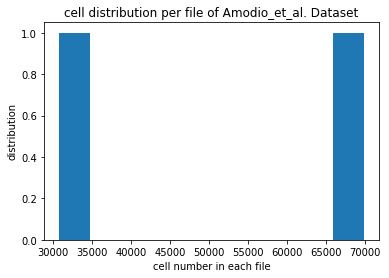

In [69]:
poolinputs_singlefolder(summary_file,input_dir, test = True)

In [19]:
data.head()

,CD27,CD19,CD45RA,TNFa,CD16,CD8a,HLA-DR,CCR4,CD25,MIP-1b,...,IFNb,TCRgd,CCR7,CCR6,CD57,CD86,CD279,Perforin,CD45,ID
0,0.333052,0.158921,1.841689,0.289930,0.065625,0.144036,0.872030,0.461688,0.183635,0.122766,...,29.704479,0.854164,0.649991,0.345809,1.054687,0.719260,0.710151,0.432568,4.558056,sample13
1,0.204077,0.214146,2.943826,0.415726,-0.000090,1.937012,0.702857,0.213606,-0.026066,0.079390,...,16.614246,0.555807,0.536014,0.099063,1.880304,0.572253,0.438108,0.240816,4.201001,sample13
2,0.499900,0.529353,3.894305,0.795198,0.234748,2.572005,0.918802,0.514302,0.217133,0.327082,...,17.905331,1.030175,0.761943,0.325918,2.963348,0.949146,0.611551,0.500313,5.076838,sample13
3,0.843965,0.720875,3.342378,1.004296,0.422187,3.098108,2.157088,0.990272,0.540074,0.615989,...,31.691736,1.641245,1.074316,0.543232,2.313082,1.088800,1.133512,0.768351,5.859250,sample13
4,0.267890,0.163961,1.967488,0.344778,0.020560,1.775598,1.581746,0.439782,0.067731,0.145144,...,31.771799,0.776118,0.554806,0.179575,0.995670,0.568744,0.808176,0.345953,4.382180,sample13


In [20]:
pd.concat([data.head(), data.head()], axis = 0 )

,CD27,CD19,CD45RA,TNFa,CD16,CD8a,HLA-DR,CCR4,CD25,MIP-1b,...,IFNb,TCRgd,CCR7,CCR6,CD57,CD86,CD279,Perforin,CD45,ID
0,0.333052,0.158921,1.841689,0.289930,0.065625,0.144036,0.872030,0.461688,0.183635,0.122766,...,29.704479,0.854164,0.649991,0.345809,1.054687,0.719260,0.710151,0.432568,4.558056,sample13
1,0.204077,0.214146,2.943826,0.415726,-0.000090,1.937012,0.702857,0.213606,-0.026066,0.079390,...,16.614246,0.555807,0.536014,0.099063,1.880304,0.572253,0.438108,0.240816,4.201001,sample13
2,0.499900,0.529353,3.894305,0.795198,0.234748,2.572005,0.918802,0.514302,0.217133,0.327082,...,17.905331,1.030175,0.761943,0.325918,2.963348,0.949146,0.611551,0.500313,5.076838,sample13
3,0.843965,0.720875,3.342378,1.004296,0.422187,3.098108,2.157088,0.990272,0.540074,0.615989,...,31.691736,1.641245,1.074316,0.543232,2.313082,1.088800,1.133512,0.768351,5.859250,sample13
4,0.267890,0.163961,1.967488,0.344778,0.020560,1.775598,1.581746,0.439782,0.067731,0.145144,...,31.771799,0.776118,0.554806,0.179575,0.995670,0.568744,0.808176,0.345953,4.382180,sample13
0,0.333052,0.158921,1.841689,0.289930,0.065625,0.144036,0.872030,0.461688,0.183635,0.122766,...,29.704479,0.854164,0.649991,0.345809,1.054687,0.719260,0.710151,0.432568,4.558056,sample13
1,0.204077,0.214146,2.943826,0.415726,-0.000090,1.937012,0.702857,0.213606,-0.026066,0.079390,...,16.614246,0.555807,0.536014,0.099063,1.880304,0.572253,0.438108,0.240816,4.201001,sample13
2,0.499900,0.529353,3.894305,0.795198,0.234748,2.572005,0.918802,0.514302,0.217133,0.327082,...,17.905331,1.030175,0.761943,0.325918,2.963348,0.949146,0.611551,0.500313,5.076838,sample13
3,0.843965,0.720875,3.342378,1.004296,0.422187,3.098108,2.157088,0.990272,0.540074,0.615989,...,31.691736,1.641245,1.074316,0.543232,2.313082,1.088800,1.133512,0.768351,5.859250,sample13
4,0.267890,0.163961,1.967488,0.344778,0.020560,1.775598,1.581746,0.439782,0.067731,0.145144,...,31.771799,0.776118,0.554806,0.179575,0.995670,0.568744,0.808176,0.345953,4.382180,sample13


In [17]:
df.ID

'sample13'